In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')
import gc


# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import matplotlib.patches as patches

from plotly import tools, subplots
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px
pd.set_option('max_columns', 100)


py.init_notebook_mode(connected=True)
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os,random, math, psutil, pickle
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [2]:
import os
print(os.listdir("./"))

['train.csv', 'Untitled2.ipynb', 'cat_feature_index.a505f1c3-992000a-581507a7-309280cc.tmp', 'sample_submission.csv', 'sample_submission.csv.zip', 'building_metadata.csv', 'energy_sub.csv', 'weather_test.csv', 'cat_feature_index.8ff4fdc3-c4905472-e192a02b-e1ba8803.tmp', 'weather_train.csv', 'cat_feature_index.d805b173-40e0d04-c3c30c4a-1dbb83a0.tmp', '.ipynb_checkpoints', 'weather_train.csv.zip', 'train.csv.zip', 'test.csv', 'cat_feature_index.d6cd3695-b92f2d37-473f515b-71b3b946.tmp', 'test.csv.zip', 'catboost_info', 'Untitled1.ipynb', 'cat_feature_index.b25268d2-cc63a851-8f034f1-2cadb8eb.tmp', 'weather_test.csv.zip', 'Untitled.ipynb']


In [3]:
root = "./"
train = pd.read_csv(root + 'train.csv')
# train_df["timestamp"] = pd.to_datetime(train_df["timestamp"], format='%Y-%m-%d %H:%M:%S')

weather_train = pd.read_csv(root + 'weather_train.csv')
test = pd.read_csv(root + 'test.csv')
weather_test = pd.read_csv(root + 'weather_test.csv')
building_meta = pd.read_csv(root + 'building_metadata.csv')
sample_submission = pd.read_csv(root + 'sample_submission.csv')

In [4]:
train.head(5)
train['meter'].value_counts()

0    12060910
1     4182440
2     2708713
3     1264037
Name: meter, dtype: int64

In [5]:
weather_train.head(5)
weather_train['site_id'].value_counts()

8     8784
0     8784
13    8783
4     8783
2     8783
10    8782
6     8782
9     8780
3     8780
14    8777
1     8763
12    8755
5     8755
11    8614
7     8614
15    8454
Name: site_id, dtype: int64

In [6]:
test.head(5)

,row_id,building_id,meter,timestamp
0,0,0,0,2017-01-01 00:00:00
1,1,1,0,2017-01-01 00:00:00
2,2,2,0,2017-01-01 00:00:00
3,3,3,0,2017-01-01 00:00:00
4,4,4,0,2017-01-01 00:00:00


In [7]:
weather_test.head(5)

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2017-01-01 00:00:00,17.8,4.0,11.7,NaN,1021.4,100.0,3.6
1,0,2017-01-01 01:00:00,17.8,2.0,12.8,0.0,1022.0,130.0,3.1
2,0,2017-01-01 02:00:00,16.1,0.0,12.8,0.0,1021.9,140.0,3.1
3,0,2017-01-01 03:00:00,17.2,0.0,13.3,0.0,1022.2,140.0,3.1
4,0,2017-01-01 04:00:00,16.7,2.0,13.3,0.0,1022.3,130.0,2.6


In [8]:
building_meta.head(5)

,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20216100 entries, 0 to 20216099
Data columns (total 4 columns):
building_id      int64
meter            int64
timestamp        object
meter_reading    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 616.9+ MB


In [10]:
weather_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139773 entries, 0 to 139772
Data columns (total 9 columns):
site_id               139773 non-null int64
timestamp             139773 non-null object
air_temperature       139718 non-null float64
cloud_coverage        70600 non-null float64
dew_temperature       139660 non-null float64
precip_depth_1_hr     89484 non-null float64
sea_level_pressure    129155 non-null float64
wind_direction        133505 non-null float64
wind_speed            139469 non-null float64
dtypes: float64(7), int64(1), object(1)
memory usage: 9.6+ MB


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41697600 entries, 0 to 41697599
Data columns (total 4 columns):
row_id         int64
building_id    int64
meter          int64
timestamp      object
dtypes: int64(3), object(1)
memory usage: 1.2+ GB


In [12]:
weather_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277243 entries, 0 to 277242
Data columns (total 9 columns):
site_id               277243 non-null int64
timestamp             277243 non-null object
air_temperature       277139 non-null float64
cloud_coverage        136795 non-null float64
dew_temperature       276916 non-null float64
precip_depth_1_hr     181655 non-null float64
sea_level_pressure    255978 non-null float64
wind_direction        264873 non-null float64
wind_speed            276783 non-null float64
dtypes: float64(7), int64(1), object(1)
memory usage: 19.0+ MB


In [13]:
building_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1449 entries, 0 to 1448
Data columns (total 6 columns):
site_id        1449 non-null int64
building_id    1449 non-null int64
primary_use    1449 non-null object
square_feet    1449 non-null int64
year_built     675 non-null float64
floor_count    355 non-null float64
dtypes: float64(2), int64(3), object(1)
memory usage: 68.0+ KB


In [14]:
train = train.merge(building_meta, on='building_id', how='left')
test = test.merge(building_meta, on='building_id', how='left')
train = train.merge(weather_train, on=['site_id', 'timestamp'], how='left')
test = test.merge(weather_test, on=['site_id', 'timestamp'], how='left')

In [15]:
d_types = {'building_id': np.int16,
          'meter': np.int8,
          'site_id': np.int8,
          'primary_use': 'category',
          'square_feet': np.int32,
          'year_built': np.float16,
          'floor_count': np.float16,
          'air_temperature': np.float32,
          'cloud_coverage': np.float16,
          'dew_temperature': np.float32,
          'precip_depth_1_hr': np.float16,
          'sea_level_pressure': np.float32,
          'wind_direction': np.float16,
          'wind_speed': np.float32}

for feature in d_types:
    train[feature] = train[feature].astype(d_types[feature])
    test[feature] = test[feature].astype(d_types[feature])
    
train["timestamp"] = pd.to_datetime(train["timestamp"])
test["timestamp"] = pd.to_datetime(test["timestamp"])
gc.collect();

In [16]:
dataset = train
train.head(5)

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,0,2016-01-01,0.0,0,Education,7432,2008.0,NaN,25.0,6.0,20.0,NaN,1019.700012,0.0,0.0
1,1,0,2016-01-01,0.0,0,Education,2720,2004.0,NaN,25.0,6.0,20.0,NaN,1019.700012,0.0,0.0
2,2,0,2016-01-01,0.0,0,Education,5376,1991.0,NaN,25.0,6.0,20.0,NaN,1019.700012,0.0,0.0
3,3,0,2016-01-01,0.0,0,Education,23685,2002.0,NaN,25.0,6.0,20.0,NaN,1019.700012,0.0,0.0
4,4,0,2016-01-01,0.0,0,Education,116607,1975.0,NaN,25.0,6.0,20.0,NaN,1019.700012,0.0,0.0


In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20216100 entries, 0 to 20216099
Data columns (total 16 columns):
building_id           int16
meter                 int8
timestamp             datetime64[ns]
meter_reading         float64
site_id               int8
primary_use           category
square_feet           int32
year_built            float16
floor_count           float16
air_temperature       float32
cloud_coverage        float16
dew_temperature       float32
precip_depth_1_hr     float16
sea_level_pressure    float32
wind_direction        float16
wind_speed            float32
dtypes: category(1), datetime64[ns](1), float16(5), float32(4), float64(1), int16(1), int32(1), int8(2)
memory usage: 1.1 GB


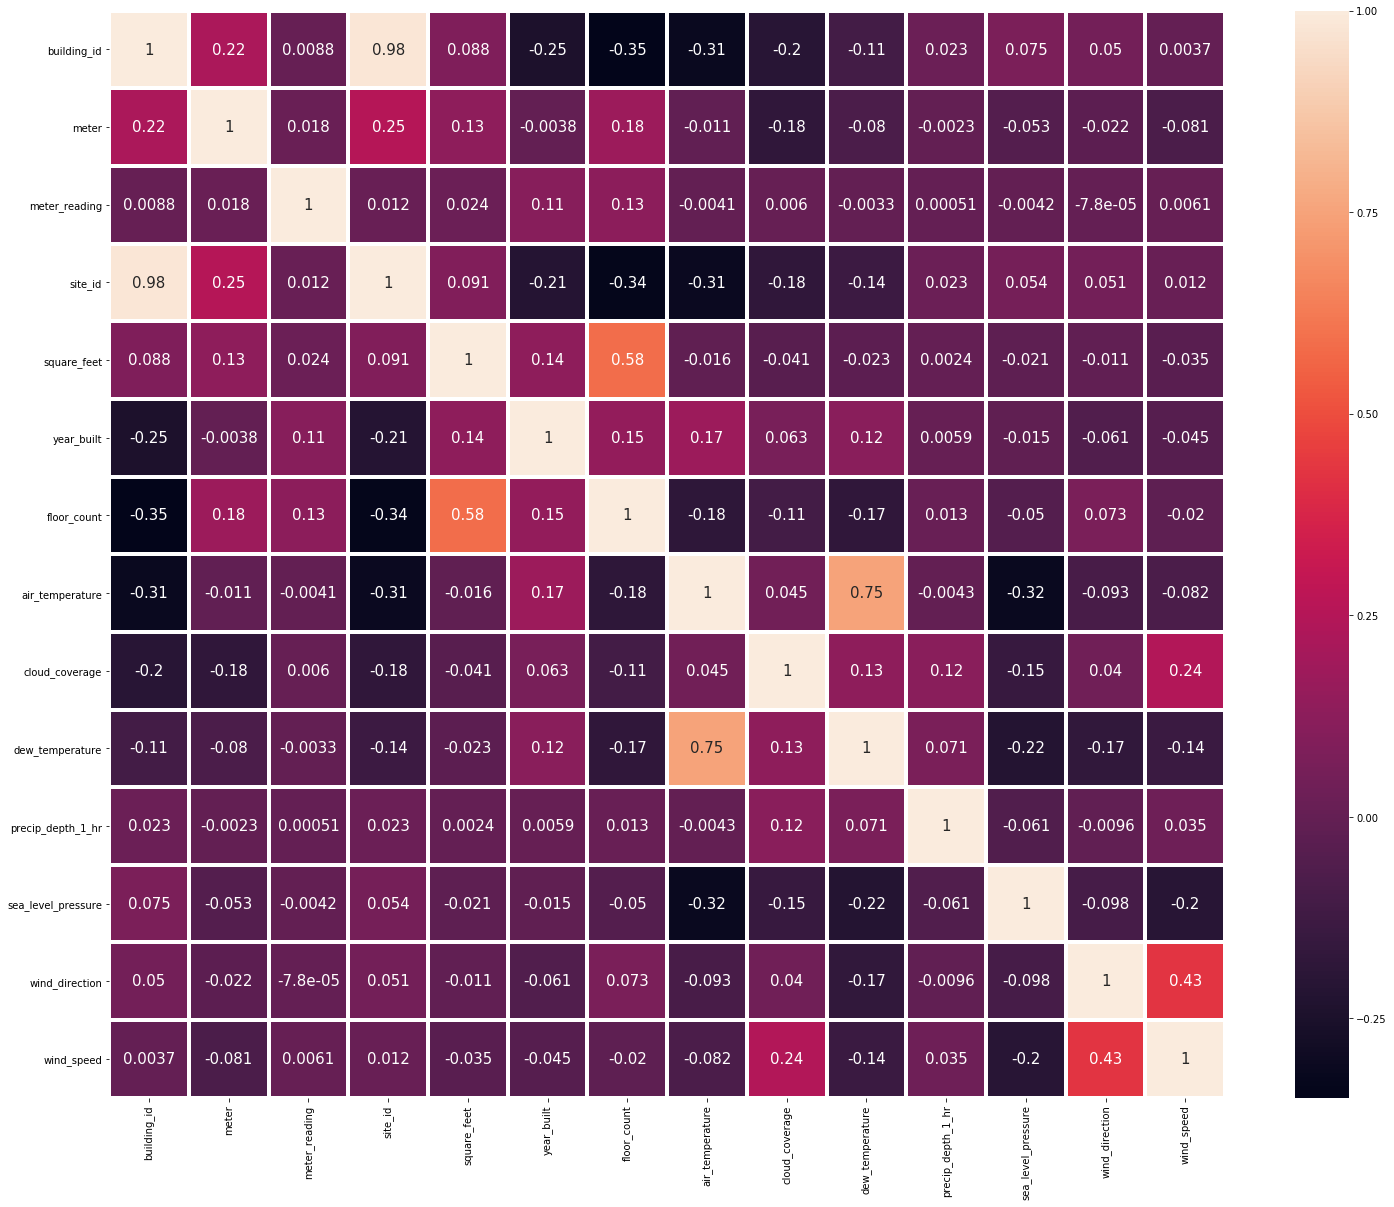

In [18]:
plt.subplots(figsize = (25,20))
sns.heatmap(train.corr(), annot=True, linewidth=3, annot_kws={'size':15})

In [19]:
train.describe()

,building_id,meter,meter_reading,site_id,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
count,2.021610e+07,2.021610e+07,2.021610e+07,2.021610e+07,2.021610e+07,8088455.0,3506933.0,2.011944e+07,11390735.0,2.011596e+07,16467077.0,1.898443e+07,18767052.0,2.007242e+07
mean,7.992780e+02,6.624412e-01,2.117121e+03,7.992232e+00,1.077830e+05,NaN,NaN,1.575020e+01,NaN,7.722728e+00,NaN,9.637975e+02,NaN,3.508670e+00
std,4.269133e+02,9.309921e-01,1.532356e+05,5.099060e+00,1.171424e+05,NaN,0.0,1.079203e+01,0.0,1.003016e+01,NaN,5.422378e+01,NaN,2.261779e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.830000e+02,1900.0,1.0,-2.890000e+01,0.0,-3.500000e+01,-1.0,9.682000e+02,0.0,0.000000e+00
25%,3.930000e+02,0.000000e+00,1.830000e+01,3.000000e+00,3.252700e+04,1951.0,1.0,8.600000e+00,0.0,0.000000e+00,0.0,1.011600e+03,70.0,2.100000e+00
50%,8.950000e+02,0.000000e+00,7.877500e+01,9.000000e+00,7.270900e+04,1969.0,3.0,1.670000e+01,0.0,8.900000e+00,0.0,1.016000e+03,180.0,3.100000e+00
75%,1.179000e+03,1.000000e+00,2.679840e+02,1.300000e+01,1.391130e+05,1993.0,6.0,2.410000e+01,4.0,1.610000e+01,0.0,1.020500e+03,280.0,4.600000e+00
max,1.448000e+03,3.000000e+00,2.190470e+07,1.500000e+01,8.750000e+05,2017.0,26.0,4.720000e+01,9.0,2.610000e+01,343.0,1.045500e+03,360.0,1.900000e+01


In [20]:
print(train.isnull().sum())
data_ratios = train.count()/len(train)
print("\n")
print(data_ratios)

building_id                  0
meter                        0
timestamp                    0
meter_reading                0
site_id                      0
primary_use                  0
square_feet                  0
year_built            12127645
floor_count           16709167
air_temperature          96658
cloud_coverage         8825365
dew_temperature         100140
precip_depth_1_hr      3749023
sea_level_pressure     1231669
wind_direction         1449048
wind_speed              143676
dtype: int64


building_id           1.000000
meter                 1.000000
timestamp             1.000000
meter_reading         1.000000
site_id               1.000000
primary_use           1.000000
square_feet           1.000000
year_built            0.400100
floor_count           0.173472
air_temperature       0.995219
cloud_coverage        0.563449
dew_temperature       0.995047
precip_depth_1_hr     0.814553
sea_level_pressure    0.939075
wind_direction        0.928322
wind_speed            0.

In [59]:
# print(test.isnull().sum())
# data_ratios = test.count()/len(test)
# print("\n")
# print(data_ratios)

row_id                       0
building_id                  0
meter                        0
timestamp                    0
site_id                      0
primary_use                  0
square_feet                  0
year_built            24598080
floor_count           34444320
air_temperature         221901
cloud_coverage        19542180
dew_temperature         260799
precip_depth_1_hr      7801563
sea_level_pressure     2516826
wind_direction         2978663
wind_speed              302089
dtype: int64


row_id                1.000000
building_id           1.000000
meter                 1.000000
timestamp             1.000000
site_id               1.000000
primary_use           1.000000
square_feet           1.000000
year_built            0.410084
floor_count           0.173950
air_temperature       0.994678
cloud_coverage        0.531336
dew_temperature       0.993745
precip_depth_1_hr     0.812901
sea_level_pressure    0.939641
wind_direction        0.928565
wind_speed            0.

In [21]:
train['primary_use'].value_counts()

Education                        8165504
Office                           4394864
Entertainment/public assembly    2264917
Lodging/residential              2146413
Public services                  1662826
Healthcare                        398527
Other                             242222
Parking                           213796
Manufacturing/industrial          125713
Food sales and service            114090
Retail                            112657
Warehouse/storage                 111861
Services                           96519
Technology/science                 77627
Utility                            56203
Religious worship                  32361
Name: primary_use, dtype: int64

In [22]:
#Counter用于统计出现次数，类似于hashmap
from collections import Counter

#利用turkey test做异常检测
def detect_outliers(df,n,features):
    outlier_indices = []
    for col in features:
        # 25%
        Q1 = np.percentile(df[col], 25)
        # 75%
        Q3 = np.percentile(df[col],75)
        # 计算Interquartile range (IQR)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        outlier_indices.extend(outlier_list_col)
        
    # 将异常值有两个以上的那些行取出
    outlier_indices = Counter(outlier_indices)
#     print(outlier_indices)
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
#     print(multiple_outliers)
    return multiple_outliers 

In [25]:
Outliers_to_drop = detect_outliers(train,2,["meter", "precip_depth_1_hr"])

In [26]:
Outliers_to_drop 

[]

In [27]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn import preprocessing

import lightgbm as lgb


class ASHRAE3Preprocessor(object):
    @classmethod
    def fit(cls, df, data_ratios=data_ratios):
        #对缺失值进行补充
        cls.avgs = df.loc[:,data_ratios < 1.0].mean()
        cls.pu_le = LabelEncoder()
        cls.pu_le.fit(df["primary_use"])

    @classmethod
    def transform(cls, df):
        #time_stamp和primary_use为非数值形式，要将其转换为数值形式
        df = df.fillna(cls.avgs) # refill NAN with averages
        df['primary_use'] = np.uint8(cls.pu_le.transform(df['primary_use']))  # encode labels

        # expand datetime into its components
#         df['hour'] = np.uint8(df['timestamp'].dt.hour)
#         df['day'] = np.uint8(df['timestamp'].dt.day)
#         df['weekday'] = np.uint8(df['timestamp'].dt.weekday)
#         df['month'] = np.uint8(df['timestamp'].dt.month)
#         df['year'] = np.uint8(df['timestamp'].dt.year-2000)
        
        # parse and cast columns to a smaller type
        df.rename(columns={"square_feet": "log_square_feet"}, inplace=True)
        #加个log
        df['log_square_feet'] = np.float16(np.log(df['log_square_feet']))
        df['year_built'] = np.uint8(df['year_built']-1900)
        df['floor_count'] = np.uint8(df['floor_count'])
        
        # remove redundant columns
#         for col in df.columns:
#             if col in ['timestamp', 'row_id']:
#                 del df[col]
    
        # extract target column
        if 'meter_reading' in df.columns:
            df['meter_reading'] = np.log1p(df['meter_reading']).astype(np.float32) # comp metric uses log errors

        return df
        
ASHRAE3Preprocessor.fit(train)

In [28]:
train = ASHRAE3Preprocessor.transform(train)
train.head(5)

,building_id,meter,timestamp,meter_reading,site_id,primary_use,log_square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,0,2016-01-01,0.0,0,0,8.914062,108,4,25.0,6.0,20.0,0.796387,1019.700012,0.0,0.0
1,1,0,2016-01-01,0.0,0,0,7.910156,104,4,25.0,6.0,20.0,0.796387,1019.700012,0.0,0.0
2,2,0,2016-01-01,0.0,0,0,8.585938,91,4,25.0,6.0,20.0,0.796387,1019.700012,0.0,0.0
3,3,0,2016-01-01,0.0,0,0,10.070312,102,4,25.0,6.0,20.0,0.796387,1019.700012,0.0,0.0
4,4,0,2016-01-01,0.0,0,0,11.664062,75,4,25.0,6.0,20.0,0.796387,1019.700012,0.0,0.0


In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20216100 entries, 0 to 20216099
Data columns (total 16 columns):
building_id           int16
meter                 int8
timestamp             datetime64[ns]
meter_reading         float32
site_id               int8
primary_use           uint8
log_square_feet       float16
year_built            uint8
floor_count           uint8
air_temperature       float32
cloud_coverage        float16
dew_temperature       float32
precip_depth_1_hr     float16
sea_level_pressure    float32
wind_direction        float16
wind_speed            float32
dtypes: datetime64[ns](1), float16(4), float32(5), int16(1), int8(2), uint8(3)
memory usage: 983.3 MB


In [30]:
print(train.isnull().sum())

building_id           0
meter                 0
timestamp             0
meter_reading         0
site_id               0
primary_use           0
log_square_feet       0
year_built            0
floor_count           0
air_temperature       0
cloud_coverage        0
dew_temperature       0
precip_depth_1_hr     0
sea_level_pressure    0
wind_direction        0
wind_speed            0
dtype: int64


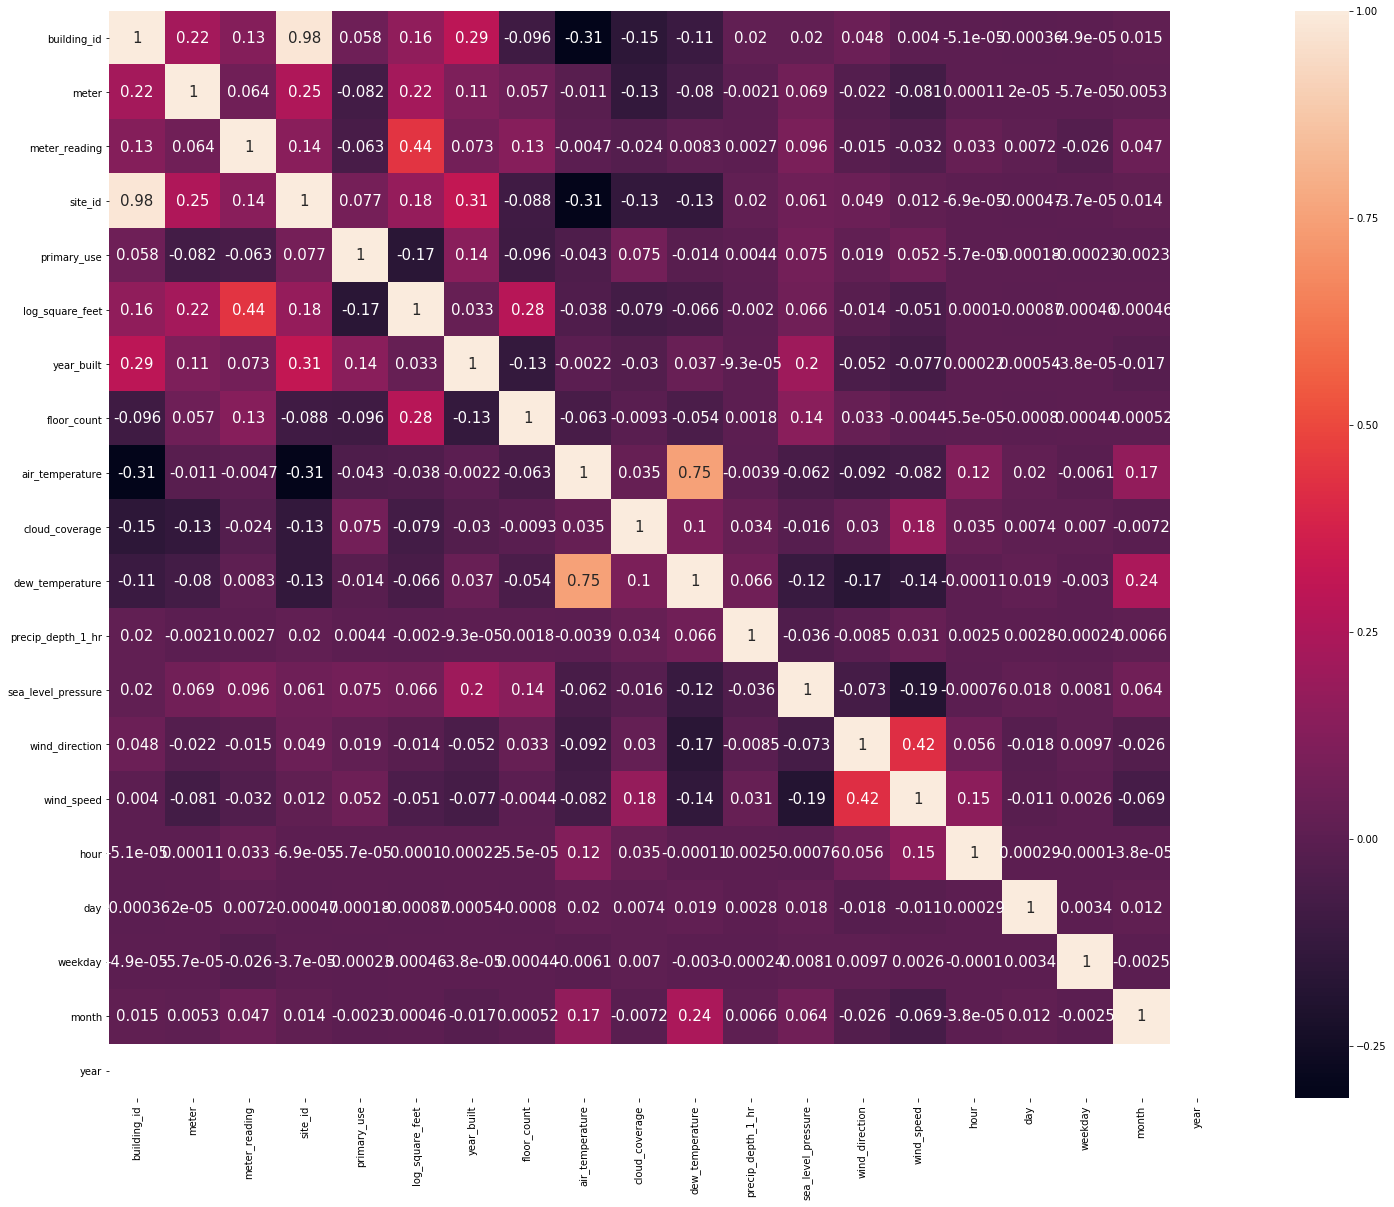

In [51]:
plt.subplots(figsize = (25,20))
sns.heatmap(train.corr(), annot=True, annot_kws={'size':15})

In [31]:
from tqdm import tqdm
drop_cols = ["precip_depth_1_hr", "sea_level_pressure", "wind_direction", "wind_speed","timestamp"]
#之前已经做过一次了，不要重复
# target = np.log1p(train["meter_reading"])  
target = train["meter_reading"]
del train["meter_reading"]
train = train.drop(drop_cols, axis=1)

In [32]:
# train.head(5)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20216100 entries, 0 to 20216099
Data columns (total 10 columns):
building_id        int16
meter              int8
site_id            int8
primary_use        uint8
log_square_feet    float16
year_built         uint8
floor_count        uint8
air_temperature    float32
cloud_coverage     float16
dew_temperature    float32
dtypes: float16(2), float32(2), int16(1), int8(2), uint8(3)
memory usage: 520.5 MB


In [33]:
train.head(5)

,building_id,meter,site_id,primary_use,log_square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature
0,0,0,0,0,8.914062,108,4,25.0,6.0,20.0
1,1,0,0,0,7.910156,104,4,25.0,6.0,20.0
2,2,0,0,0,8.585938,91,4,25.0,6.0,20.0
3,3,0,0,0,10.070312,102,4,25.0,6.0,20.0
4,4,0,0,0,11.664062,75,4,25.0,6.0,20.0


In [23]:
import lightgbm as lgb
from sklearn.model_selection import KFold
from numpy import *

from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
# lightbgm
lgb_params_grid = {
    'n_estimators':[100,200,500, 1000],
    'boosting_type': ['gbdt'],
    'objective': ['regression'],
#     'metric': [{'rmse'}],
    'subsample': [0.2],
    'learning_rate': [0.01, 0.1, 0.5, 0.9],
    'feature_fraction': [0.9],
    'bagging_fraction': [0.9],
    'alpha': [0.1],
    'lambda': [0.1]
}

kfold = KFold(n_splits=3)

LGB = lgb.LGBMRegressor(n_estimators=6000,
                                learning_rate=0.28,
                                feature_fraction=0.9,
                                subsample=0.2)
gsLGB = GridSearchCV(LGB, param_grid=lgb_params_grid, cv=kfold, n_jobs=4, verbose=1)
gsLGB.fit(train, target)
LGB_best = gsLGB.best_estimator_

print(gsLGB.best_params_)
print(gsLGB.best_score_)
# LGB.fit(train, target, verbose=1)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  48 out of  48 | elapsed: 41.3min finished


{'alpha': 0.1, 'bagging_fraction': 0.9, 'boosting_type': 'gbdt', 'feature_fraction': 0.9, 'lambda': 0.1, 'learning_rate': 0.1, 'n_estimators': 1000, 'objective': 'regression', 'subsample': 0.2}
0.4224588945172635


In [25]:
print(gsLGB.best_params_)
print(gsLGB.best_score_)

{'alpha': 0.1, 'bagging_fraction': 0.9, 'boosting_type': 'gbdt', 'feature_fraction': 0.9, 'lambda': 0.1, 'learning_rate': 0.1, 'n_estimators': 1000, 'objective': 'regression', 'subsample': 0.2}
0.4224588945172635


In [34]:
import lightgbm as lgb
from sklearn.model_selection import KFold
from numpy import *

from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
# lightbgm
# lgb_params_grid = {
#     'n_estimators':[100,200,500, 1000],
#     'boosting_type': ['gbdt'],
#     'objective': ['regression'],
# #     'metric': [{'rmse'}],
#     'subsample': [0.2],
#     'learning_rate': [0.01, 0.1, 0.5, 0.9],
#     'feature_fraction': [0.9],
#     'bagging_fraction': [0.9],
#     'alpha': [0.1],
#     'lambda': [0.1]
# }

# kfold = KFold(n_splits=3)

LGB = lgb.LGBMRegressor(n_estimators=6000,
                                learning_rate=0.28,
                                feature_fraction=0.9,
                                subsample=0.2,
                                subsample_freq=1,
                                num_leaves=20,
                                metric='rmse',
                                objective='regression',
                                boosting_type='gbdt',
                                lamda=0.1
                                )
# gsLGB = GridSearchCV(LGB, param_grid=lgb_params_grid, cv=kfold, n_jobs=4, verbose=1)
# gsLGB.fit(train, target)
# LGB_best = gsLGB.best_estimator_

# print(gsLGB.best_params_)
# print(gsLGB.best_score_)
LGB.fit(train, target, verbose=200)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              feature_fraction=0.9, importance_type='split', lamda=0.1,
              learning_rate=0.28, max_depth=-1, metric='rmse',
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=6000, n_jobs=-1, num_leaves=20,
              objective='regression', random_state=None, reg_alpha=0.0,
              reg_lambda=0.0, silent=True, subsample=0.2,
              subsample_for_bin=200000, subsample_freq=1)

In [36]:
test.head(5)

,row_id,building_id,meter,timestamp,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,0,0,2017-01-01,0,Education,7432,2008.0,NaN,17.799999,4.0,11.7,NaN,1021.400024,100.0,3.6
1,1,1,0,2017-01-01,0,Education,2720,2004.0,NaN,17.799999,4.0,11.7,NaN,1021.400024,100.0,3.6
2,2,2,0,2017-01-01,0,Education,5376,1991.0,NaN,17.799999,4.0,11.7,NaN,1021.400024,100.0,3.6
3,3,3,0,2017-01-01,0,Education,23685,2002.0,NaN,17.799999,4.0,11.7,NaN,1021.400024,100.0,3.6
4,4,4,0,2017-01-01,0,Education,116607,1975.0,NaN,17.799999,4.0,11.7,NaN,1021.400024,100.0,3.6


In [37]:
print(test.isnull().sum())
data_ratios = test.count()/len(test)
print("\n")
print(data_ratios)

row_id                       0
building_id                  0
meter                        0
timestamp                    0
site_id                      0
primary_use                  0
square_feet                  0
year_built            24598080
floor_count           34444320
air_temperature         221901
cloud_coverage        19542180
dew_temperature         260799
precip_depth_1_hr      7801563
sea_level_pressure     2516826
wind_direction         2978663
wind_speed              302089
dtype: int64


row_id                1.000000
building_id           1.000000
meter                 1.000000
timestamp             1.000000
site_id               1.000000
primary_use           1.000000
square_feet           1.000000
year_built            0.410084
floor_count           0.173950
air_temperature       0.994678
cloud_coverage        0.531336
dew_temperature       0.993745
precip_depth_1_hr     0.812901
sea_level_pressure    0.939641
wind_direction        0.928565
wind_speed            0.

In [38]:
class ASHRAE3Preprocessor(object):
    @classmethod
    def fit(cls, df, data_ratios=data_ratios):
        #对缺失值进行补充
        cls.avgs = df.loc[:,data_ratios < 1.0].mean()
        cls.pu_le = LabelEncoder()
        cls.pu_le.fit(df["primary_use"])

    @classmethod
    def transform(cls, df):
        #time_stamp和primary_use为非数值形式，要将其转换为数值形式
        df = df.fillna(cls.avgs) # refill NAN with averages
        df['primary_use'] = np.uint8(cls.pu_le.transform(df['primary_use']))  # encode labels

        # expand datetime into its components
#         df['hour'] = np.uint8(df['timestamp'].dt.hour)
#         df['day'] = np.uint8(df['timestamp'].dt.day)
#         df['weekday'] = np.uint8(df['timestamp'].dt.weekday)
#         df['month'] = np.uint8(df['timestamp'].dt.month)
#         df['year'] = np.uint8(df['timestamp'].dt.year-2000)
        
        # parse and cast columns to a smaller type
        df.rename(columns={"square_feet": "log_square_feet"}, inplace=True)
        #加个log
        df['log_square_feet'] = np.float16(np.log(df['log_square_feet']))
        df['year_built'] = np.uint8(df['year_built']-1900)
        df['floor_count'] = np.uint8(df['floor_count'])
        
        # remove redundant columns
#         for col in df.columns:
#             if col in ['timestamp', 'row_id']:
#                 del df[col]
    
        # extract target column
        if 'meter_reading' in df.columns:
            df['meter_reading'] = np.log1p(df['meter_reading']).astype(np.float32) # comp metric uses log errors

        return df

ASHRAE3Preprocessor.fit(test)

In [39]:
test = ASHRAE3Preprocessor.transform(test)
test.head(5)

,row_id,building_id,meter,timestamp,site_id,primary_use,log_square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,0,0,2017-01-01,0,0,8.914062,108,3,17.799999,4.0,11.7,0.966797,1021.400024,100.0,3.6
1,1,1,0,2017-01-01,0,0,7.910156,104,3,17.799999,4.0,11.7,0.966797,1021.400024,100.0,3.6
2,2,2,0,2017-01-01,0,0,8.585938,91,3,17.799999,4.0,11.7,0.966797,1021.400024,100.0,3.6
3,3,3,0,2017-01-01,0,0,10.070312,102,3,17.799999,4.0,11.7,0.966797,1021.400024,100.0,3.6
4,4,4,0,2017-01-01,0,0,11.664062,75,3,17.799999,4.0,11.7,0.966797,1021.400024,100.0,3.6


In [40]:
from tqdm import tqdm
drop_cols = ["precip_depth_1_hr", "sea_level_pressure", "wind_direction", "wind_speed","timestamp"]
# target = np.log1p(train["meter_reading"])  
# del test["meter_reading"]
test = test.drop(drop_cols, axis=1)


In [41]:
test.isnull().sum()

row_id             0
building_id        0
meter              0
site_id            0
primary_use        0
log_square_feet    0
year_built         0
floor_count        0
air_temperature    0
cloud_coverage     0
dew_temperature    0
dtype: int64

In [42]:
test = test.drop("row_id", axis=1)
result_lgb = pd.Series(LGB.predict(test))

In [43]:
print(np.expm1(result_lgb[:5]))
print(result_lgb[:5])

0   -0.034917
1    0.300597
2   -0.472052
3    1.326773
4    0.863362
dtype: float64
0   -0.035541
1    0.262823
2   -0.638757
3    0.844482
4    0.622382
dtype: float64


In [38]:
result_lgb = np.expm1(result_lgb)
sample_submission["meter_reading"] = result_lgb

In [39]:
sample_submission.loc[sample_submission['meter_reading']<0, 'meter_reading'] = 0
sample_submission.head(5)

,row_id,meter_reading
0,0,0.000000
1,1,0.000000
2,2,0.000000
3,3,0.073426
4,4,2.619001


In [40]:
sample_submission.to_csv("energy_sub.csv", index=False)

In [63]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41697600 entries, 0 to 41697599
Data columns (total 2 columns):
row_id           int64
meter_reading    float64
dtypes: float64(1), int64(1)
memory usage: 636.3 MB


In [45]:
from catboost import Pool, CatBoostRegressor
cat_model = CatBoostRegressor(loss_function="RMSE",
                           eval_metric="RMSE",
                           task_type="CPU",
                           learning_rate=0.1,
#                            iterations=180000,
                           l2_leaf_reg=5,
                           random_seed=42
#                            od_type="Iter",
#                            depth=7,
#                            early_stopping_rounds=3000, 
#                            border_count=32
#                            n_estimators = 2000,
#                            metric_period=10,
#                            devices="3"
    )
train_data = Pool(train, label = target)
cat_model = cat_model.fit(train_data,
#                     eval_set=valid_data,
                    use_best_model=True,
                    verbose=2000)

You should provide test set for use best model. use_best_model parameter has been switched to false value.


0:	learn: 4.2801948	total: 1.44s	remaining: 23m 54s
999:	learn: 1.2087023	total: 18m 16s	remaining: 0us


In [47]:
# test = test.drop("row_id", axis=1)
result_cat = pd.Series(cat_model.predict(test))

In [48]:
print(np.expm1(result_cat[:5]))
print(result_cat[:5])

0     3.503661
1     2.467645
2     0.513408
3     3.416032
4    10.164274
dtype: float64
0    1.504891
1    1.243476
2    0.414364
3    1.485242
4    2.412719
dtype: float64


In [49]:
result_cat = np.expm1(result_cat)
sample_submission["meter_reading"] = result_cat
sample_submission.loc[sample_submission['meter_reading']<0, 'meter_reading'] = 0
sample_submission.to_csv("energy_sub1.csv", index=False)

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import roc_curve,auc,roc_auc_score
from sklearn.ensemble import forest

def set_rf_samples(n):
    forest._generate_sample_indices = (lambda rs, n_samples:
        forest.check_random_state(rs).randint(0, n_samples, n))
set_rf_samples(150000)

In [34]:
%%time
rfc = RandomForestRegressor(n_estimators=1000,min_samples_leaf=500,
                              random_state=0,n_jobs=-1)
rfc.fit(train,target)

CPU times: user 41 µs, sys: 13 µs, total: 54 µs
Wall time: 65.8 µs


In [35]:
%%time
import xgboost as xgb
XGB = xgb.XGBRegressor(n_estimators = 1000, 
                         max_depth=5, 
                         subsample=.8, 
                         learning_rate=0.1, 
                         colsample_bytree=.8,
                         objective='reg:squarederror'
                        )

XGB.fit(train, target,
#           eval_set=[(X_train, y_train), (X_val, y_val)],
#           eval_metric='rmse',
          verbose=True)

CPU times: user 21 µs, sys: 7 µs, total: 28 µs
Wall time: 35.5 µs


In [35]:
from sklearn.ensemble import VotingRegressor

votingC = VotingRegressor(estimators=[('rfc', rfc), ('xgb', XGB),
('lgb', LGB), ('cat',cat_model)], n_jobs=4)

votingC = votingC.fit(train, target)

In [50]:
result_xgb = pd.Series(rfc.predict(test))
result_xgb = np.expm1(result_xgb)
sample_submission["meter_reading"] = result_xgb
sample_submission.loc[sample_submission['meter_reading']<0, 'meter_reading'] = 0
sample_submission.to_csv("energy_sub2.csv", index=False)

In [52]:
result_rfc = pd.Series(XGB.predict(test))
result_rfc = np.expm1(result_rfc)
sample_submission["meter_reading"] = result_rfc
sample_submission.loc[sample_submission['meter_reading']<0, 'meter_reading'] = 0
sample_submission.to_csv("energy_sub3.csv", index=False)

In [ ]:
import warnings
warnings.filterwarnings("ignore")
outs = [pd.read_csv(os.path.join(sub_path, f), index_col=0) for f in all_files]
concat_sub = pd.concat(outs, axis=1)
cols = list(map(lambda x: "mol" + str(x), range(len(concat_sub.columns))))
concat_sub.columns = cols
concat_sub.reset_index(inplace=True)
concat_sub.head()
ncol = concat_sub.shape[1]